Test technique:

Sujet 1: Une compagnie Aérienne en développement  
 
soit une liste d’aéroports couverts par la compagnie ABC, ayant comme base l’aéroport « LGA » , 
nous souhaitons trouver des trajets optimaux pour nos clients. 
Sachant que nos avions sont disponibles aux aéroports suivant: 

airports = ["BGI", "CDG", "DEL", "DOH", "DSM", "EWR", "EYW", "HND", "ICN", "JFK", "LGA", "LHR", "ORD", "SAN", "SFO", "SIN", "TLV", "BUD"]
et que nous avons les connections (DANS UN SEUL SENS) suivantes: 
connexions = [
	["DSM", "ORD"],
	["ORD", "BGI"],
	["BGI", "LGA"],
	["SIN", "CDG"],
	["CDG", "BUG"],
	["DEL", "DOH"],
	["DEL", "CDG"],
	["TLV", "DEL"],
	["EWR", "HND"],
	["HND", "ICN"],
	["ICN", "JFK"],	
	["JFK", "LGA"],
	["EYW", "LHR"],	
	["LHR", "SFO"],
	["SFO", "SAN"],	
	["SFO", "DSM"],
	["SAN", "EYW"],
]
exemple: on peut prendre un vol de DSM vers ORD et uniquement dans ce sens 
l’idée est d’assurer que tous les aéroports dans la liste airports soient accessibles à partir de LGA, 
écrire un algorithme (pseudo code et/ou graphique puis code si possible) pour déterminer le nombre minimum de connections (dans un seul sens) à ouvrir pour permettre aux voyageurs
 de joindre tous les autres aéroports depuis LGA.


## L'idée est simple
#####1) D'abord on prend les noeuds qui n'ont pas des prédécesseurs (on va les appeller tête de graphes), ce sont des noeuds qu'on est sur de les ajouter au nombre des modifications#####
#####2) On parcourt ces noeuds pour enregister tous les noeuds parcouru depuis#####
#####3) on teste si on a pu couvrir tout le graphe#####
#####4) Sinon on vérifie tous les cycles non connecté, si la tête de cycle n'a pas éte parcouru avant, ça veut dire qu'on doit l'ajouter et on incriminte le nombre de correction#####

In [99]:
edges = [
	["DSM", "ORD"],
	["ORD", "BGI"],
	["BGI", "LGA"],
	["SIN", "CDG"],
	["CDG", "BUG"],
	["DEL", "DOH"],
	["DEL", "CDG"],
	["TLV", "DEL"],
	["EWR", "HND"],
	["HND", "ICN"],
	["ICN", "JFK"],	
	["JFK", "LGA"],
	["EYW", "LHR"],	
	["LHR", "SFO"],
	["SFO", "SAN"],	
	["SFO", "DSM"],
	["SAN", "EYW"],
]

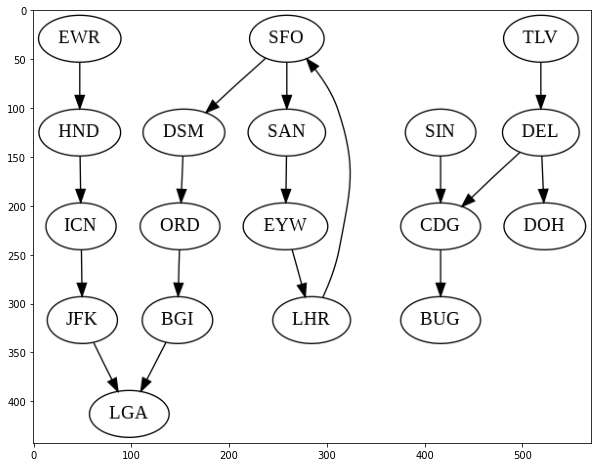

In [100]:
#affichage de graphe
import pydot
graph = pydot.Dot('graphname', graph_type='digraph') 
for edge in edges:
  graph.add_edge(pydot.Edge(edge[0], edge[1]))
  graph.write_png('graph.png')

import matplotlib.pyplot as plt
from skimage.io import imread
img = imread('graph.png')
plt.figure(figsize = (10,8))
plt.imshow(img)

In [102]:
# fonction pour avoir les noeuds qui on pas un prédécesseur
def get_noeud_sans_pred(edges):
  return set([edge for sub in edges for edge in sub]) - set([x[1] for x in edges])

In [103]:
#test
get_noeud_sans_pred(edges)

{'EWR', 'SIN', 'TLV'}

In [104]:
def convertir_graph_dict(edges):
  adjacency_dict = dict()
  for x in edges:
    if x[0] not in adjacency_dict.keys():    
      adjacency_dict[x[0]] = []
      adjacency_dict[x[0]].append(x[1])
    else:
      adjacency_dict[x[0]].append(x[1])
  return adjacency_dict

In [105]:
def get_visited_node(graph, source):

       if source is None or source not in graph:
           return [source]
       path = []
       stack = [source]

       while(len(stack) != 0):
           s = stack.pop()
           if s not in path:
               path.append(s)
           if s not in graph:
               #leaf node
               continue
           for neighbor in graph[s]:
               stack.append(neighbor)

       return path

In [106]:
#test
graph = convertir_graph_dict(edges)
get_visited_node(graph,"EWR")

['EWR', 'HND', 'ICN', 'JFK', 'LGA']

In [107]:
import networkx as nx
# fonction pour detecter le nombre de cycles non connecté dans le graphe
def detect_cycle(edges):
  G = nx.DiGraph(edges)
  return list(nx.simple_cycles(G))

In [109]:
def minimum_correction(edges):
  #flatten les noeuds uniques
  nodes = set([edge for sub in edges for edge in sub])
  # les noeudes sans prédécesseur
  nodes_no_pred = get_noeud_sans_pred(edges)
  
  #convertir vers dict graphe pour la découverte de graphe
  dict_graphe = convertir_graph_dict(edges)
  
  #get visited_nodes_a partir de noeudes sans pred
  visited = []
  
  for node in nodes_no_pred:
    visited.append(get_visited_node(dict_graphe,node))

  #flatten les noeuds visité
  visited = set([edge for sub in visited for edge in sub])
  
  # si on a découvert tout on return le nombre de correction est egale au noeud sans pred
  if len(visited) == len(nodes):
    return len(nodes_no_pred)
  else:
  #sinon on a des cycles non connecté on test si on a pu couvrir ce cycle avant, sinon on ajoute +1 a counteur de correction
    count_not_visited_cycle = 0
    cycles = detect_cycle(edges)
    for i,_ in enumerate(cycles):
      if cycles[i][1] not in visited:
        count_not_visited_cycle+=1
      
    return len(nodes_no_pred) + count_not_visited_cycle
    
  

  

In [110]:
print("Le nombre de connexion a ajouter pour couvrir LGA dans ce graphe est {}".format(minimum_correction(edges)))


Le nombre de connexion a ajouter pour couvrir LGA dans ce graphe est 4


##Sujet 2 

Pour la partie 2 j'ai essuyé mais je savais pas comment obtenir les valeurs des variables internes d'une fonction à travers le décorateur pour puis les utiliser dans le logger (autrement dit comment atteindre le run-time stack de la fonction à travers le décorateur en question)


In [84]:
# clear all variables de la question1
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [111]:
import inspect
import logging



def logger(f):
  def inner(*args):
    sign = inspect.signature(f).bind(*args)
    # les noms variable
    print(f.__code__.co_varnames)
    # les valeur des paramétres
    print(sign.args)
    # nom de la fonction
    print(f.__name__)
    return f(*args)
  return inner 

@logger
def add(a,b):
  c = 5
  d = a + b +c
  return d

In [112]:
add(1,2)

('a', 'b', 'c', 'd')
(1, 2)
add


8